In [1]:
import seqeval
import ppg_init as ppg
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

initialized data is stored in the following directory:
..\data\generated image numbers


In [2]:
data_dir = '..\\data\\pathgen out\\'
data_fname = 'path_Num_ea_'

df = []
for i in range(ppg.NO_DIGITS):
    df.append(pd.read_csv(data_dir+
        data_fname+str(i)+'.csv'))
    
x2 = df[2]['x']
y2 = df[2]['y']
z = [(x2[i],y2[i]) for i in range(len(x2))]
z

[(7, 9),
 (7, 8),
 (6, 5),
 (6, 6),
 (5, 6),
 (7, 6),
 (7, 5),
 (4, 7),
 (5, 7),
 (7, 4),
 (7, 3),
 (7, 7),
 (3, 3),
 (2, 3),
 (2, 4),
 (2, 8),
 (3, 8),
 (2, 7),
 (1, 4),
 (1, 6),
 (1, 7),
 (1, 5)]

(-0.5, 9.5, 9.5, -0.5)

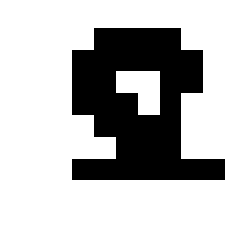

In [3]:
img = seqeval.draw_digit(z, ppg.LOW_RESOLUTION_IMG_SIZE)
plt.figure()
plt.imshow(img, cmap='gray')
plt.axis('off')

In [4]:
estimated_image = np.ones([ppg.LOW_RESOLUTION_IMG_SIZE,ppg.LOW_RESOLUTION_IMG_SIZE], dtype=int)
p2 = (7,7)
p1 = (3,3)
seqeval.draw_line(estimated_image, p1, p2)

(-0.5, 9.5, 9.5, -0.5)

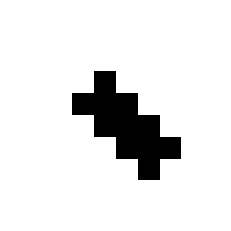

In [5]:
plt.figure()
plt.imshow(estimated_image, cmap='gray')
plt.axis('off')

## testing sampling in robot drawing.

In [47]:
import math
NO_DIGITS = 10 # number of digits

data_dir = '..\\data\\path(t) numbers\\'
data_fname = 'patht_Num_ea_'

DRAWING_TIME = 2 * math.pi + 1.5
DIGIT = 0
SAMPLE_DISTANCE = 0.01

In [48]:
# Functions
def sample_line(p1, p2):
    dist = math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
    n = int(dist//SAMPLE_DISTANCE)
    print(n)

    sampx = np.zeros(n-1)
    sampy = np.zeros(n-1)
    for i in range(1,n):
        sampx[i-1] = (p2[0]-p1[0]) * (i/n) + p1[0]
        sampy[i-1] = (p2[1]-p1[1]) * (i/n) + p1[1]
    return sampx, sampy

In [49]:
# Load xt and yt data.
df = []
for i in range(NO_DIGITS):
    df.append(pd.read_csv(data_dir+
        data_fname+str(i)+'.csv'))

In [50]:
ctr = 0
# clock_period = DRAWING_TIME/len(df[DIGIT])
clock_period = 0.5

raw_sequence_x = df[DIGIT]['x'].tolist()
raw_sequence_y = df[DIGIT]['y'].tolist()

sampled_sequence_x = []
sampled_sequence_y = []


for i in range(len(raw_sequence_x)-1):
    samples_x, samples_y = sample_line((raw_sequence_x[i],raw_sequence_y[i]),
                            (raw_sequence_x[i+1],raw_sequence_y[i+1]))

    sampled_sequence_x.append(raw_sequence_x[i])
    sampled_sequence_y.append(raw_sequence_y[i])

    sampled_sequence_x = sampled_sequence_x + [x for x in samples_x]
    sampled_sequence_y = sampled_sequence_y + [y for y in samples_y]

sampled_sequence_x.append(raw_sequence_x[-1])
sampled_sequence_y.append(raw_sequence_y[-1])

print(sampled_sequence_x)
print(len(sampled_sequence_x))
print(sampled_sequence_y)


6
6
6
6
6
6
6
6
6
6
6
[1.0, 1.011111111111111, 1.0222222222222224, 1.0333333333333334, 1.0444444444444445, 1.0555555555555558, 1.0666666666666669, 1.077777777777778, 1.088888888888889, 1.1, 1.1111111111111114, 1.1222222222222225, 1.1333333333333335, 1.1444444444444446, 1.1555555555555557, 1.166666666666667, 1.177777777777778, 1.188888888888889, 1.2000000000000002, 1.2000000000000002, 1.2000000000000002, 1.2000000000000002, 1.2000000000000002, 1.2000000000000002, 1.2000000000000002, 1.2000000000000002, 1.2000000000000002, 1.2000000000000002, 1.2000000000000002, 1.2000000000000002, 1.2000000000000002, 1.2000000000000002, 1.2000000000000002, 1.2000000000000002, 1.2000000000000002, 1.2000000000000002, 1.2000000000000002, 1.188888888888889, 1.177777777777778, 1.166666666666667, 1.1555555555555557, 1.1444444444444446, 1.1333333333333335, 1.1222222222222225, 1.1111111111111114, 1.1, 1.088888888888889, 1.077777777777778, 1.0666666666666669, 1.0555555555555558, 1.0444444444444445, 1.03333333333